# Today: EDA GROUPS!

Choose a team, and then spend some time looking at data.  We want you to explore the data using the techniques we learned this far including:

- Grouping / subsetting / segmentation
- Summary statistics
    - Histograms
    - Plotting
- Slicing
- Cleaning data
    - assessing proper types
    - expected values
    - object converstion
   

At the end of our exploratory analysis, each group will be giving a 10 minute presentation on their findings to the rest of class.


## Team Popcorn

You're a force to be reckoned with when you `read_csv` into your `movie_df` dataframe.  You are team "Popcorn".  It would be nice to know:

 - Which movies remained in the top 10 the longest
 - Which movies were good investments?
 
 Bonus:
 - Do any holidays impact sales performance or position?


_[There's a data dictionary available!](http://www.amstat.org/publications/jse/v17n1/datasets.mclaren.html)_

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

movie_df = pd.read_csv("../assets/data/movie_weekend.csv")
movie_df.head()

,NUMBER,MOVIE,WEEK_NUM,WEEKEND_PER_THEATER,WEEKEND_DATE
0,1.0,A Beautiful Mind,1.0,701.0,12/21/01
1,1.0,A Beautiful Mind,2.0,14820.0,12/28/01
2,1.0,A Beautiful Mind,3.0,8940.0,1/4/02
3,1.0,A Beautiful Mind,4.0,6850.0,1/11/02
4,1.0,A Beautiful Mind,5.0,5280.0,1/18/02


In [2]:
movie_df.tail()

,NUMBER,MOVIE,WEEK_NUM,WEEKEND_PER_THEATER,WEEKEND_DATE
1276,49.0,You Can Count on Me,27.0,409.0,5/11/01
1277,49.0,You Can Count on Me,28.0,594.0,5/18/01
1278,49.0,You Can Count on Me,29.0,741.0,5/25/01
1279,49.0,You Can Count on Me,30.0,737.0,6/1/01
1280,49.0,You Can Count on Me,31.0,589.0,6/8/01


In [3]:
movie_df.describe()

,NUMBER,WEEK_NUM,WEEKEND_PER_THEATER
count,1254.000000,1254.000000,1254.000000
mean,24.236045,14.915470,3634.688198
std,14.371764,9.996769,5121.749363
min,1.000000,1.000000,128.000000
25%,11.000000,7.000000,1034.500000
50%,25.000000,13.000000,1921.500000
75%,36.000000,21.000000,3733.250000
max,49.000000,52.000000,53846.000000


In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 5 columns):
NUMBER                 1254 non-null float64
MOVIE                  1254 non-null object
WEEK_NUM               1254 non-null float64
WEEKEND_PER_THEATER    1254 non-null float64
WEEKEND_DATE           1254 non-null object
dtypes: float64(3), object(2)
memory usage: 50.1+ KB


In [5]:
movie_df.columns = (u'NUMBER', u'MOVIE', u'WEEK_NUM', u'REV',
       u'WEEKEND_DATE')
movie_df['WEEKEND_DATE'] = pd.to_datetime(movie_df['WEEKEND_DATE'])
#movie_df.shape

In [6]:
movie_df.dtypes

NUMBER                 float64
MOVIE                   object
WEEK_NUM               float64
REV                    float64
WEEKEND_DATE    datetime64[ns]
dtype: object

In [7]:
top_10 = movie_df['MOVIE'].value_counts().head(10)
top_10

ET                         52
Raiders of the Lost Ark    43
Return of the Jedi         42
Forrest Gump               42
Titanic                    41
American Beauty            38
Chicago                    36
Gladiator                  33
Beverly Hills Cop          33
Shakespeare in Love        33
Name: MOVIE, dtype: int64

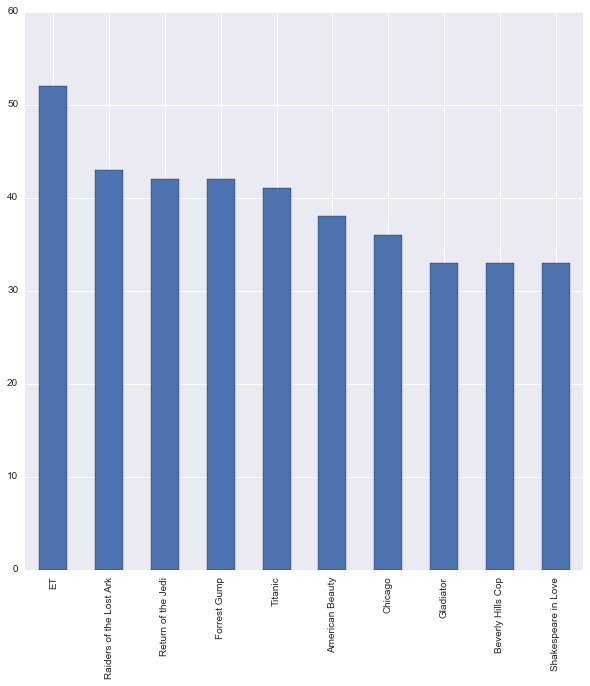

In [22]:
top_10.plot.bar(figsize=(10, 10))

In [9]:
top_rev = movie_df.groupby('MOVIE').sum()[['REV']]
top_rev.sort_values('REV',ascending=False).head(10)

,REV
MOVIE,
Star Wars,228181.0
ET,201257.0
"Empire Strikes Back, The",178013.0
American Beauty,165891.0
Titanic,165701.0
Return of the Jedi,163572.0
Million Dollar Baby,154115.0
Chicago,146062.0
Raiders of the Lost Ark,144778.0


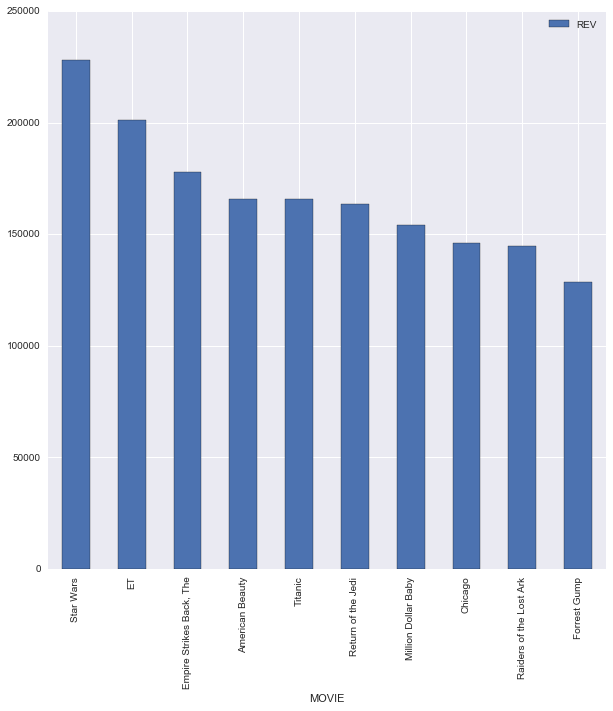

In [23]:
top_rev.sort_values('REV',ascending=False).head(10).plot.bar(figsize=(10, 10))

In [11]:
cumulative = movie_df.groupby('MOVIE')

In [12]:
movie_df['cumulative'] = cumulative['REV'].cumsum()

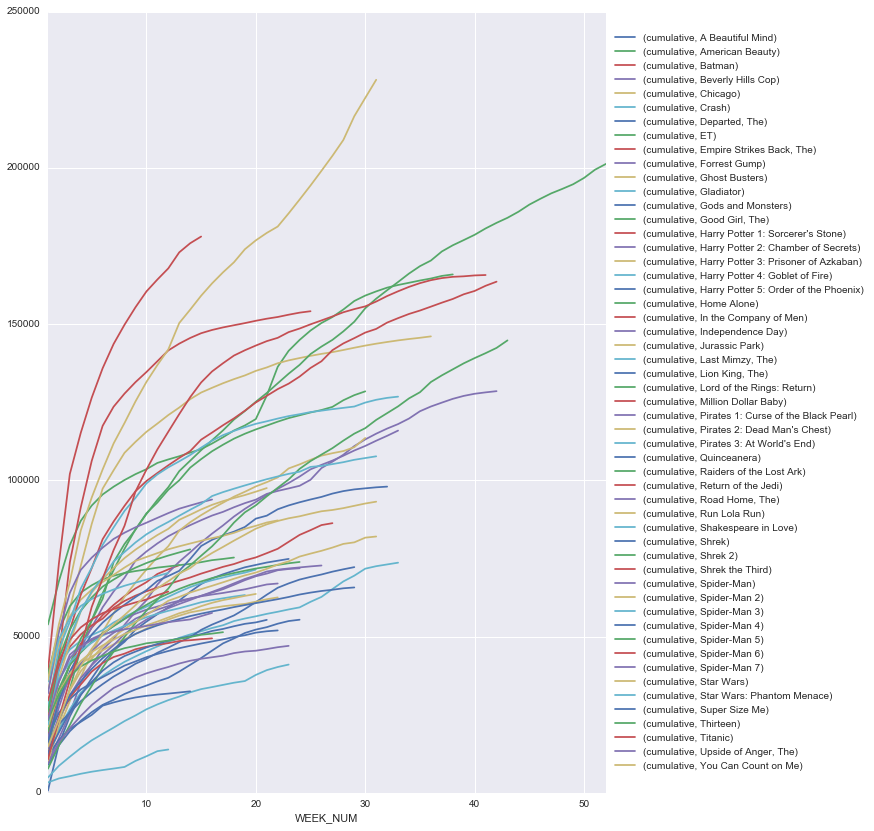

In [24]:
new_df2 = movie_df[['MOVIE','WEEK_NUM','cumulative']]
new_df2.index = new_df2['WEEK_NUM']

new_df3 = pd.pivot_table(new_df2,columns = 'MOVIE', values = ['cumulative'], index=['WEEK_NUM'])
new_df3.plot(figsize=(10, 14)).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [14]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start=movie_df["WEEKEND_DATE"].min(), end=movie_df["WEEKEND_DATE"].max())

movie_df["isholiday"] = movie_df["WEEKEND_DATE"].isin(holidays)

In [17]:
holidays_df = movie_df[movie_df["isholiday"] == True]

not_holidays_df = movie_df[movie_df["isholiday"] == False]


print holidays_df["REV"].mean()
print not_holidays_df["REV"].mean()

5700.2173913
3596.09585703
